In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m


In [2]:
data      =pd.read_excel('data.xlsx')
crude_oil =pd.read_csv('crude.csv')
gdp       = pd.read_csv('gdp.csv')

### crude oil demand based on Elasticity
elesticity in general is defined as 
$ E(t) = ( ΔEC(t)/ΔEC(t) / ΔI(I) ) $
where t is time period
I is driving period


for this section we will used $ GDP $ as driving variables


In [3]:
#data exploration
crude_oil.head(10)

,Report generated on: 07-14-2021 19:42:40,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Series Key,INTL.53-1-CHN-TBPD.A,Series Key,INTL.55-1-CHN-TBPD.A,Series Key,INTL.56-1-CHN-TBPD.A,Series Key,INTL.57-1-CHN-TBPD.A,Series Key,INTL.58-1-CHN-TBPD.A,Series Key,INTL.59-1-CHN-TBPD.A
1,Series Name,"Petroleum and other liquids production, China,...",Series Name,"Crude oil, NGPL, and other liquids production,...",Series Name,"Refinery processing gain, China, Annual",Series Name,Crude oil including lease condensate productio...,Series Name,"Natural gas plant liquids production, China, A...",Series Name,"Other liquids production, China, Annual"
2,Units,TBPD,Units,TBPD,Units,TBPD,Units,TBPD,Units,TBPD,Units,TBPD
3,Frequency,A,Frequency,A,Frequency,A,Frequency,A,Frequency,A,Frequency,A
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1973,1090,1973,1090,1980,0,1973,1090,1980,0,1980,0
9,1974,1315,1974,1315,1981,0,1974,1315,1981,0,1981,0


In [4]:
new_header_crude = crude_oil.iloc[1]
#crude_oil = crude_oil[2:]
crude_oil.columns =new_header_crude
crude_oil= crude_oil.drop(range(0,8), axis =0)

In [5]:
crude_oil.head()

1,Series Name,"Petroleum and other liquids production, China, Annual",Series Name,"Crude oil, NGPL, and other liquids production, China, Annual",Series Name,"Refinery processing gain, China, Annual",Series Name,"Crude oil including lease condensate production, China, Annual",Series Name,"Natural gas plant liquids production, China, Annual",Series Name,"Other liquids production, China, Annual"
8,1973,1090,1973,1090,1980,0,1973,1090,1980,0,1980,0
9,1974,1315,1974,1315,1981,0,1974,1315,1981,0,1981,0
10,1975,1490,1975,1490,1982,0,1975,1490,1982,0,1982,0
11,1976,1670,1976,1670,1983,0,1976,1670,1983,0,1983,0
12,1977,1874,1977,1874,1984,0,1977,1874,1984,0,1984,0


In [6]:
#renaming data
names_crude={"Series Name":"Year","Petroleum and other liquids production, China, Annual":"Crude_Production",
            "Crude oil, NGPL, and other liquids production, China, Annual":"Crude_and_NGPL",
            "Refinery processing gain, China, Annual":"Refinery",
            "Crude oil including lease condensate production, China, Annual":"Crude_Lease",
            "Natural gas plant liquids production, China, Annual":"Natural_gas",
            "Other liquids production, China, Annual":"other_liquids"}

In [7]:
China_crude = crude_oil.rename(columns =names_crude)

In [8]:
China_crude.head()

1,Year,Crude_Production,Year,Crude_and_NGPL,Year,Refinery,Year,Crude_Lease,Year,Natural_gas,Year,other_liquids
8,1973,1090,1973,1090,1980,0,1973,1090,1980,0,1980,0
9,1974,1315,1974,1315,1981,0,1974,1315,1981,0,1981,0
10,1975,1490,1975,1490,1982,0,1975,1490,1982,0,1982,0
11,1976,1670,1976,1670,1983,0,1976,1670,1983,0,1983,0
12,1977,1874,1977,1874,1984,0,1977,1874,1984,0,1984,0


from data we need to extract crude oil demand and time change
China_crude = Crude_oil[["Report generated on: 07-14-2021 19:42:40"]]

In [9]:
#deal with Gdp data
gdp.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
3,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.670151e+10,1.748822e+10,1.853584e+10,2.007325e+10,2.186583e+10,2.396287e+10,...,8.962560e+11,9.131970e+11,9.276550e+11,9.563190e+11,8.931000e+11,8.547520e+11,9.622690e+11,9.840320e+11,9.778090e+11,8.984740e+11
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
5,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,6.584280e+11,7.169350e+11,8.078190e+11,8.469430e+11,7.574920e+11,6.874850e+11,6.809890e+11,7.381310e+11,7.920790e+11,7.865850e+11
6,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,6.230691e+10
7,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.528661e+10,1.479962e+10
8,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN
9,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.494920e+12,2.769080e+12,2.849690e+12,2.884650e+12,2.513210e+12,2.461970e+12,2.511060e+12,2.758000e+12,2.811180e+12,2.530190e+12


In [10]:
gdp_header = gdp.iloc[1]
gdp.columns =gdp_header

In [11]:
gdp.head()

1,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
3,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.670151e+10,1.748822e+10,1.853584e+10,2.007325e+10,2.186583e+10,2.396287e+10,...,8.962560e+11,9.131970e+11,9.276550e+11,9.563190e+11,8.931000e+11,8.547520e+11,9.622690e+11,9.840320e+11,9.778090e+11,8.984740e+11
4,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10


In [12]:
china= gdp.loc[gdp['Country Name']=='China']

In [13]:
china

1,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
42,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,...,7.551500e+12,8.532230e+12,9.570410e+12,1.047570e+13,1.106160e+13,1.123330e+13,1.231040e+13,1.389480e+13,1.427990e+13,1.472270e+13


In [14]:
china=pd.DataFrame(china.T ).reset_index(inplace=False)

In [15]:
china.head()

,1,42
0,Country Name,China
1,Country Code,CHN
2,Indicator Name,GDP (current US$)
3,Indicator Code,NY.GDP.MKTP.CD
4,1960.0,59716467625.0


In [16]:
gdp_names= {1:"Years",42:"GDP"}

china=china.rename(columns=gdp_names)
china.head()

,Years,GDP
0,Country Name,China
1,Country Code,CHN
2,Indicator Name,GDP (current US$)
3,Indicator Code,NY.GDP.MKTP.CD
4,1960.0,59716467625.0


In [17]:
china_gdp = china.drop(range(0,4), axis=0)
china_gdp.head()

,Years,GDP
4,1960.0,59716467625.0
5,1961.0,50056868958.0
6,1962.0,47209359006.0
7,1963.0,50706799903.0
8,1964.0,59708343489.0


In [18]:
china_gdp.dtypes

Years    object
GDP      object
dtype: object

In [19]:
china_gdp['Years']=pd.to_datetime(china_gdp['Years'].astype(int), format='%Y')


In [26]:
china_gdp['GDP']= china_gdp['GDP'].astype('float32')

In [27]:
china_gdp.dtypes

Years    datetime64[ns]
GDP             float32
dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years', ylabel='GDP'>

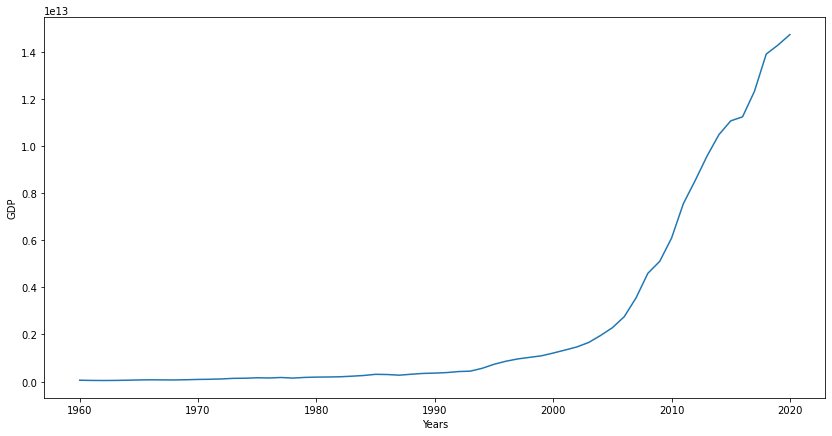

In [29]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.lineplot('Years', 'GDP', data =china_gdp)